In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Data set: SMS Spam Collection Dataset, UCI Machine Learning
df = pd.read_csv('mail_data.csv', encoding='latin-1')

In [ ]:
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
'''
Flow of Project:
01: Data Cleaning
02: EDA
03: Text Preprocessing
04: Model Building
05: Evaluation
06: Improvement
07: Website
08: Deployment
'''

'\nFlow of Project:\n01: Data Cleaning\n02: EDA\n03: Text Preprocessing\n04: Model Building\n05: Evaluation\n06: Improvement\n07: Website\n08: Deployment\n'

#01: DATA CLEANING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#drop last 3 column
#df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
df.sample(5)

,Category,Message
108,ham,How would my ip address test that considering ...
3019,ham,I didn't get the second half of that message
3973,ham,WOT U UP 2 J?
5272,ham,Hello.How u doing?What u been up 2?When will u...
1218,ham,"Damn, can you make it tonight or do you want t..."


In [ ]:
#rename
df.rename(columns={'Category':'target', 'Message':'text'}, inplace=True)

In [ ]:
df.sample(5)

,target,text
4973,ham,I'm fine. Hope you are good. Do take care.
3630,ham,Should I head straight there or what
3988,spam,Ringtone Club: Gr8 new polys direct to your mo...
1244,ham,No shoot me. I'm in the docs waiting room. :/
322,ham,Hey... Why dont we just go watch x men and hav...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.sample(5)

,target,text
3374,0,Looks like you found something to do other tha...
2804,1,FreeMsg>FAV XMAS TONES!Reply REAL
2245,0,No management puzzeles.
3515,0,I always chat with you. In fact i need money c...
768,0,"Sorry, I'll call later"


In [ ]:

#missing value
df.isnull().sum()

,0
target,0
text,0


In [ ]:
#duplicate value
df.duplicated().sum()

np.int64(415)

In [ ]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.shape

(5157, 2)

#02: EDA

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,641


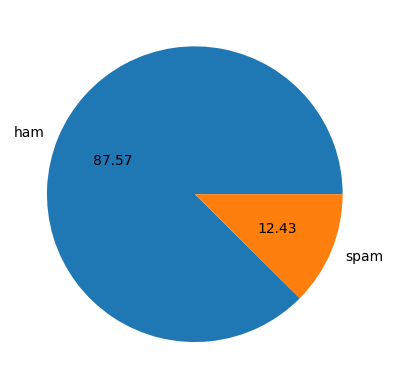

In [ ]:

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [ ]:
#Data is imbalance

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df['text'].apply(len)

,text
0,111
1,29
2,155
3,49
4,61
...,...
5567,161
5568,37
5569,57
5570,125


In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
#num of word
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
#no. sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.228040,18.544890,1.969750
std,58.451149,13.401415,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#ham
df[df['target']== 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.951063,17.250664,1.827724
std,56.730031,13.581714,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
df[df['target']== 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.541342,27.663027,2.970359
std,30.516111,7.104050,1.485575
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


#03: Data Preprocessing
1. Lower Case
2. Tokenizatio
3. Removing special character
4. Removing Stop words and punctuation
5. Stemming (Dace = damcing, dances)




In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
df['transformed_text']= df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [ ]:
spamwc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

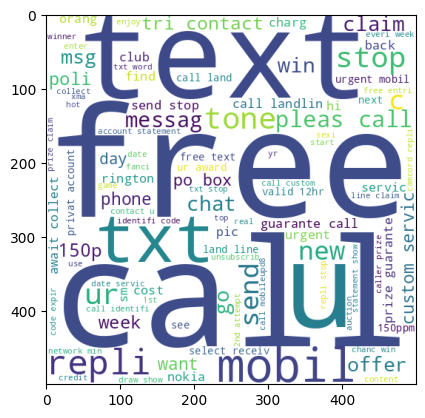

In [ ]:
plt.imshow(spamwc)

In [ ]:
hamwc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

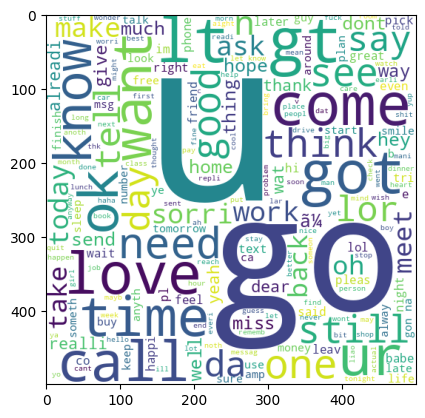

In [ ]:
plt.imshow(hamwc)

#04: Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
x =tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
x.shape

(5157, 6777)

In [ ]:
y = df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:

gnb = GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8691860465116279
[[787 118]
 [ 17 110]]
0.4824561403508772


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9612403100775194
[[905   0]
 [ 40  87]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9718992248062015
[[902   3]
 [ 26 101]]
0.9711538461538461


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
user_input = input("Enter a message to classify as spam or ham: ")
processed_input = transform_text(user_input)
vectorized_input = tfidf.transform([processed_input])
prediction = mnb.predict(vectorized_input)

if prediction[0] == 1:
  print("This is a spam message.")
else:
  print("This is a ham message.")

Enter a message to classify as spam or ham: hi
This is a ham message.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Initialize the models
lr = LogisticRegression(solver='liblinear', random_state=2)
dtc = DecisionTreeClassifier(max_depth=5, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

# Train the models
lr.fit(X_train, y_train)
dtc.fit(X_train, y_train)
abc.fit(X_train, y_train)

print("Logistic Regression model trained.")
print("Decision Tree Classifier model trained.")
print("AdaBoost Classifier model trained.")

Logistic Regression model trained.
Decision Tree Classifier model trained.
AdaBoost Classifier model trained.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score

# Make predictions on X_test for each model
y_pred_lr = lr.predict(X_test)
y_pred_dtc = dtc.predict(X_test)
y_pred_abc = abc.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Precision: {precision_score(y_test, y_pred_lr)}\n")

# Evaluate Decision Tree Classifier
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dtc)}")
print(f"Precision: {precision_score(y_test, y_pred_dtc)}\n")

# Evaluate AdaBoost Classifier
print("AdaBoost Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_abc)}")
print(f"Precision: {precision_score(y_test, y_pred_abc)}\n")

Logistic Regression:
Accuracy: 0.9505813953488372
Precision: 0.9634146341463414

Decision Tree Classifier:
Accuracy: 0.935077519379845
Precision: 0.8191489361702128

AdaBoost Classifier:
Accuracy: 0.9302325581395349
Precision: 0.8571428571428571



In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a list of estimators
estimators = [('mnb', mnb), ('lr', lr), ('dtc', dtc), ('abc', abc)]

# Instantiate the Voting Classifier
vc = VotingClassifier(estimators=estimators, voting='hard', n_jobs=-1)

# Train the Voting Classifier
voting_classifier_model = vc.fit(X_train, y_train)

# Make predictions on X_test
y_pred_vc = voting_classifier_model.predict(X_test)

# Evaluate Voting Classifier
print("Voting Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_vc)}")
print(f"Precision: {precision_score(y_test, y_pred_vc)}\n")

Voting Classifier:
Accuracy: 0.9447674418604651
Precision: 1.0



In [ ]:
accuracy_scores = {
    'GaussianNB': accuracy_score(y_test, y_pred1),
    'MultinomialNB': accuracy_score(y_test, y_pred2),
    'BernoulliNB': accuracy_score(y_test, y_pred3),
    'LogisticRegression': accuracy_score(y_test, y_pred_lr),
    'DecisionTreeClassifier': accuracy_score(y_test, y_pred_dtc),
    'AdaBoostClassifier': accuracy_score(y_test, y_pred_abc),
    'VotingClassifier': accuracy_score(y_test, y_pred_vc)
}

precision_scores = {
    'GaussianNB': precision_score(y_test, y_pred1),
    'MultinomialNB': precision_score(y_test, y_pred2),
    'BernoulliNB': precision_score(y_test, y_pred3),
    'LogisticRegression': precision_score(y_test, y_pred_lr),
    'DecisionTreeClassifier': precision_score(y_test, y_pred_dtc),
    'AdaBoostClassifier': precision_score(y_test, y_pred_abc),
    'VotingClassifier': precision_score(y_test, y_pred_vc)
}

print("\n--- Accuracy Scores ---")
for model, score in accuracy_scores.items():
    print(f"{model}: {score:.4f}")

print("\n--- Precision Scores ---")
for model, score in precision_scores.items():
    print(f"{model}: {score:.4f}")


--- Accuracy Scores ---
GaussianNB: 0.8692
MultinomialNB: 0.9612
BernoulliNB: 0.9719
LogisticRegression: 0.9506
DecisionTreeClassifier: 0.9351
AdaBoostClassifier: 0.9302
VotingClassifier: 0.9448

--- Precision Scores ---
GaussianNB: 0.4825
MultinomialNB: 1.0000
BernoulliNB: 0.9712
LogisticRegression: 0.9634
DecisionTreeClassifier: 0.8191
AdaBoostClassifier: 0.8571
VotingClassifier: 1.0000


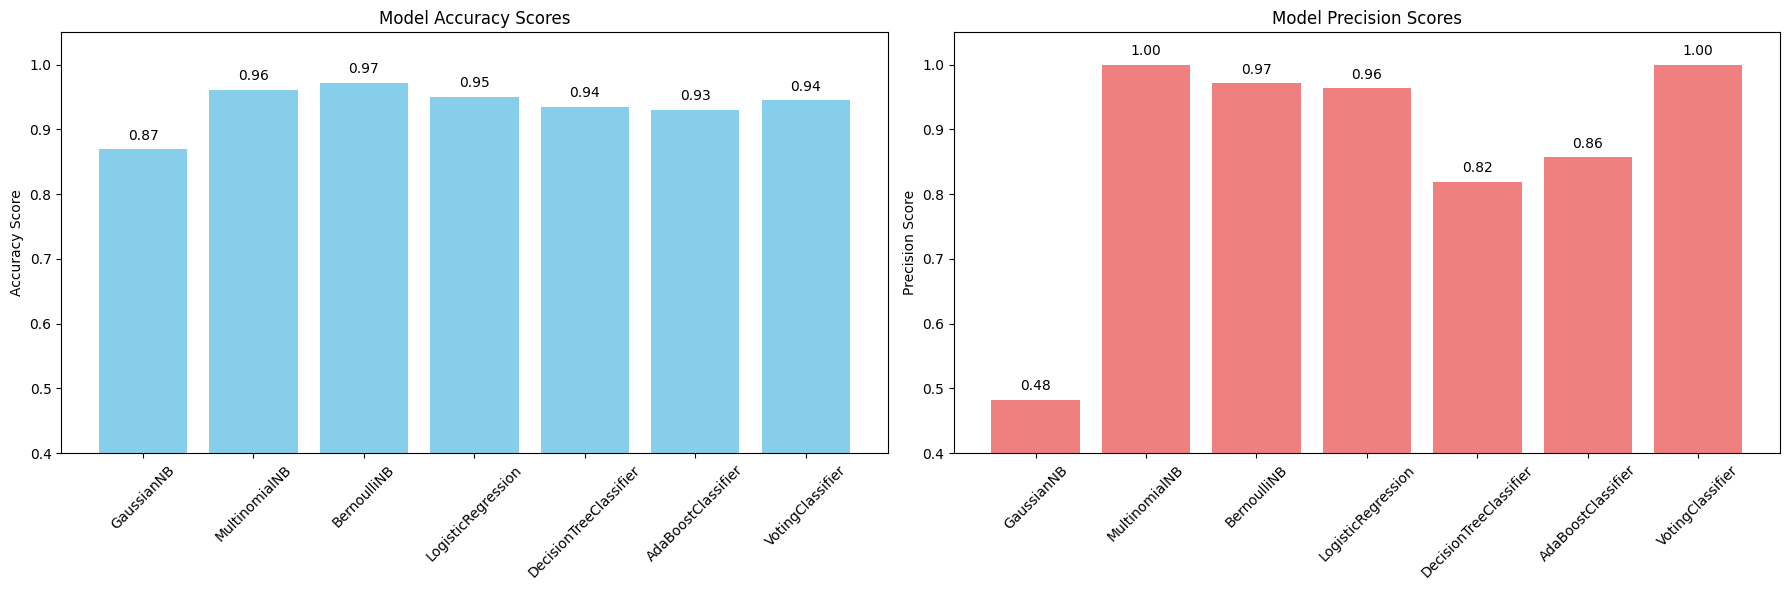

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plotting Accuracy Scores
models = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())
axes[0].bar(models, accuracies, color='skyblue')
axes[0].set_title('Model Accuracy Scores')
axes[0].set_ylabel('Accuracy Score')
axes[0].set_ylim(0.4, 1.05) # Set y-axis limit to better show differences
axes[0].tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability
for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

# Plotting Precision Scores
precisions = list(precision_scores.values())
axes[1].bar(models, precisions, color='lightcoral')
axes[1].set_title('Model Precision Scores')
axes[1].set_ylabel('Precision Score')
axes[1].set_ylim(0.4, 1.05) # Set y-axis limit to better show differences
axes[1].tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability
for i, v in enumerate(precisions):
    axes[1].text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()